In [115]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import sem
from scipy.stats import shapiro
from scipy.stats import normaltest
from scipy.stats import ttest_rel,ttest_ind,wilcoxon
from scipy.stats import pearsonr, spearmanr
import json
import statsmodels.api as sm
import pylab as py

In [116]:
plt.rcParams.update(plt.rcParamsDefault)
# set font and font size
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12

In [117]:
home_dir = '/Users/dbao/My_Drive'+'/road_construction/data/2022_online/'
data_dir = home_dir + 'R_analysis_data/'
out_dir = home_dir + 'figures/figures_final/'
out_dir2 = home_dir + 'stat_model/final/'

In [118]:
data_choice_level = pd.read_csv(data_dir +  'choice_level/choicelevel_data.csv') # first column is index  
data_choice_level = data_choice_level.rename(columns={'Unnamed: 0':'index_copy'})

data_choice_level['currNumCities'] = data_choice_level.currNumCities - 1 # starting from 0
data_choice_level['allMAS'] = data_choice_level.allMAS - 1
data_choice_level['currMas'] = data_choice_level.currMas - 1

sc_data_choice_level = data_choice_level[data_choice_level['condition']==1].reset_index(drop=True) 
sc_data_choice_level

,index_copy,subjects,puzzleID,trialID,allMAS,path,choice,currNumCities,currMas,reward,...,severityOfErrors,error,cumulative_error,missed_reward,error_rate,RT,undoRT,tortuosity,branching,branchingFirst
0,0,0,27,0,10,[0],0,0,10,0,...,0,0,0,0,0.0,-1,NaN,0.000000,False,False
1,1,0,27,0,10,"[0, 15]",15,1,10,2,...,0,0,0,0,0.0,5770,NaN,1.000000,False,False
2,2,0,27,0,10,"[0, 15, 24]",24,2,10,8,...,0,0,0,0,0.0,1311,NaN,1.130933,False,False
3,3,0,27,0,10,"[0, 15, 24, 17]",17,3,10,18,...,0,0,0,0,0.0,1263,NaN,1.128554,False,False
4,4,0,27,0,10,"[0, 15, 24, 17, 12]",12,4,10,32,...,0,0,0,0,0.0,3639,NaN,1.256188,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67928,111883,99,30,68,7,"[0, 16, 25, 27, 3]",3,4,7,32,...,0,0,0,0,0.0,918,NaN,1.068325,False,False
67929,111884,99,30,68,7,"[0, 16, 25, 27, 3, 29]",29,5,7,50,...,0,0,0,0,0.0,810,NaN,1.076896,False,False
67930,111885,99,30,68,7,"[0, 16, 25, 27, 3, 29, 18]",18,6,7,72,...,0,0,0,0,0.0,1033,NaN,1.152506,False,False
67931,111886,99,30,68,7,"[0, 16, 25, 27, 3, 29, 18, 5]",5,7,7,98,...,0,0,0,0,0.0,903,NaN,1.218016,False,False


## error rate (fixed metric)

In [119]:
# Pre-sort data based on condition, subject, puzzleID, and index for efficiency.
undo_level = data_choice_level[data_choice_level['condition'] == 1].sort_values(by=["subjects", "puzzleID"])
basic_level = data_choice_level[data_choice_level['condition'] == 0].sort_values(by=["subjects", "puzzleID"])

# Function to calculate mas_gain for each group.
def calculate_mas_gain(group):
    # Group by puzzleID and take the last 'currMas' value, then compute difference.
    undo_mas = undo_level[undo_level['subjects'] == group.name].groupby('puzzleID')['currMas'].last()
    basic_mas = basic_level[basic_level['subjects'] == group.name].groupby('puzzleID')['currMas'].last()
    return undo_mas.values - basic_mas.values

# Group by subjects and apply the function to calculate mas_gain for each subject.
mas_gain = undo_level.groupby('subjects').apply(calculate_mas_gain)
# Convert the result into a numpy array if needed.
mas_gain = np.array(mas_gain.tolist())

print(mas_gain)

[[ 0  0  0 ...  0  0  0]
 [-3  0  0 ...  1  1  1]
 [ 0  1  0 ...  1 -1  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 1  0  0 ...  0  1  0]
 [-1  0  0 ...  1  0  1]]


In [120]:
mas_gain_persub = mas_gain.mean(axis=1)
mas_gain_persub

array([ 0.06521739,  0.13043478,  0.63043478,  0.2173913 ,  0.10869565,
        0.13043478,  0.13043478,  0.19565217,  0.06521739,  0.26086957,
        0.2173913 ,  0.2173913 ,  0.17391304,  0.17391304,  0.08695652,
        0.04347826,  0.23913043,  0.36956522,  0.13043478,  0.13043478,
        0.17391304,  0.2173913 , -0.10869565,  0.13043478,  0.17391304,
        0.02173913, -0.2826087 ,  0.63043478,  0.19565217,  0.08695652,
        0.15217391,  0.26086957,  0.39130435,  0.23913043,  0.26086957,
        0.02173913,  0.2826087 , -0.10869565,  0.43478261,  0.15217391,
        0.39130435,  0.23913043, -0.10869565,  0.17391304,  0.13043478,
        0.2173913 ,  0.02173913, -0.06521739,  0.04347826,  0.06521739,
        0.45652174,  0.02173913, -0.17391304,  0.2173913 ,  0.        ,
        0.13043478, -0.13043478,  0.26086957, -0.06521739, -0.08695652,
        0.17391304,  0.04347826,  0.04347826,  0.02173913,  0.08695652,
        0.        ,  0.10869565,  0.04347826,  0.26086957,  0.10

# Error rate

In [121]:
# Pre-sort the DataFrame to optimize access patterns.
sc_data_choice_level_sorted = sc_data_choice_level.sort_values(by=["subjects", "puzzleID", "index_copy"])

def process_puzzle(puzzle_group):
    firstUndo_idx = puzzle_group[puzzle_group["firstUndo"] == 1].index
    # get the last index of the puzzle
    submit_idx = pd.Index([len(puzzle_group) - 1])

    error_rate_data = []  # Placeholder for error rate data for this puzzle.

    if not firstUndo_idx.empty:
        t_idx = (firstUndo_idx[1:] - 1).tolist() if len(firstUndo_idx) > 1 else submit_idx # terminal index
        if not len(t_idx) or t_idx[-1] != submit_idx:
            t_idx.extend(submit_idx)  # Include the submit action

        # Adjust indices for operations that depend on specific undo actions
        firstundo_idx_adjusted = firstUndo_idx - 1 # before first undo
        t_idx_adjusted = np.array(t_idx, dtype=int) + 1
        t_idx_adjusted[-1] = t_idx_adjusted[-1] - 1

        length_error_rate = []
        
        for i in range(len(firstundo_idx_adjusted)):
            slice_indices = slice(firstundo_idx_adjusted[i], t_idx_adjusted[i])
            currnct = puzzle_group["currNumCities"].iloc[slice_indices].to_numpy()
            currmas = puzzle_group["currMas"].iloc[slice_indices].to_numpy()

            # Identify where undo finishes & redo starts
            idx_2 = np.where(currnct == min(currnct))[0][0] 

            # if i == 0:  # For the first undo index
            error_before = np.abs(currmas[idx_2] - currmas[0]) / np.abs(currnct[idx_2] - currnct[0]) if np.abs(currnct[idx_2] - currnct[0]) != 0 else np.nan
            # if i == len(firstundo_idx_adjusted)-1:  # For the last undo index
            error_after = np.abs(currmas[idx_2] - currmas[-1]) / np.abs(currnct[idx_2] - currnct[-1]) if np.abs(currnct[idx_2] - currnct[-1]) != 0 else np.nan

            # Append the calculated errors outside the loop
            length_error_rate.append([error_before, error_after, 
                                      puzzle_group["subjects"].iloc[0], puzzle_group["puzzleID"].iloc[0]])

        error_rate_data.extend(length_error_rate)

    return error_rate_data

# Define a function to process each subject's data.
def process_subject(subject_group):
    error_rates = []
    for puzzle_id, puzzle_group in subject_group.groupby("puzzleID"):
        puzzle_error_rates = process_puzzle(puzzle_group.reset_index(drop=True))
        error_rates.extend(puzzle_error_rates)
    return error_rates

# Group by subjects and apply the processing function.
data_error_rate = sc_data_choice_level_sorted.groupby("subjects").apply(process_subject)
data_error_rate = data_error_rate.explode()
data_error_rate = data_error_rate.dropna()
data_error_rate = data_error_rate.to_list()
data_error_rate = [x for x in data_error_rate if x!=[]]
data_error_rate = np.array(data_error_rate, dtype=float)
data_error_rate

array([[ 0.16666667,  0.        ,  0.        ,  8.        ],
       [ 0.5       ,  0.        ,  0.        , 18.        ],
       [ 0.        ,  0.        ,  0.        , 19.        ],
       ...,
       [ 0.        ,  0.        , 99.        , 44.        ],
       [ 0.        ,  0.        , 99.        , 44.        ],
       [ 0.        ,  0.        , 99.        , 44.        ]])

/var/folders/1f/jm7zf5792lvd000qt0vb8jmr5t6hzx/T/ipykernel_59692/4093378386.py:7: RuntimeWarning: Mean of empty slice
  error_rate_ = np.array([np.nanmean(data_error_rate[np.where(data_error_rate[:,2]==i)[0],:2], axis=0) for i in range(100)])


1.5677916434013785e-14 99.0


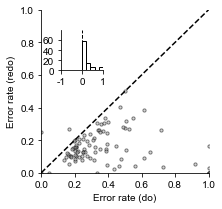

In [122]:
# scatter plot of time taken
%matplotlib inline

plt.figure(figsize=(3,3))

# average over subjects, which is third column
error_rate_ = np.array([np.nanmean(data_error_rate[np.where(data_error_rate[:,2]==i)[0],:2], axis=0) for i in range(100)])

# Convert the list to a numpy array for easier handling and display the first few means as a sample
error_rate_ = np.array(error_rate_)
valid_subidx = np.where(~np.isnan(error_rate_[:,0]))[0]

plt.scatter(error_rate_[valid_subidx,0], error_rate_[valid_subidx,1], color=[.7,.7,.7], s=10, alpha=0.5, edgecolor = 'k')

plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xticks([0,0.2,0.4,0.6,0.8,1])
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel('Error rate (do)')
plt.ylabel('Error rate (redo)')

# remove top and right frame
sns.despine()

# mid line
# plt.plot([0,6],[0,6], 'k--')
plt.plot([0,1],[0,1], 'k--')

# set xticks and yticks
# plt.xticks([0,5,10,15])
# plt.yticks([0,5,10,15])

# make inset and include hist_error_magnitude
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
axins = inset_axes(plt.gca(), width="25%", height="25%", loc=2, borderpad=2)
axins.hist(error_rate_[valid_subidx,0]-error_rate_[valid_subidx,1], bins=np.linspace(-1,1,11), color='w', alpha=1, label='Undo Allowed', edgecolor='k')
# center line of histogram at x = 0
axins.plot([0,0],[0,80], 'k--', linewidth=1)
axins.arrow(np.mean(error_rate_[valid_subidx,0]-error_rate_[valid_subidx,1]), 80, 0, -18, head_width=0.15, head_length=4, fc='k', ec='k')

# statistical test between currmas_with_undo and currmas_without_undo
from scipy.stats import wilcoxon
stat, p = wilcoxon(error_rate_[valid_subidx,0], error_rate_[valid_subidx,1])
print(p,stat)

# set x and y lim of axins
axins.set_xlim([-1, 1])
axins.set_ylim([0,80])

# set x and y ticks of axins
axins.set_xticks([-1,0,1])

# set xtickslabel of axins
axins.set_xticklabels(['-1','0','1'])
axins.set_yticks([0,20,40,60])


# remove top and right frame
sns.despine()

# save figure
plt.savefig(out_dir + '/error_rate_doredo.png', dpi=300, bbox_inches='tight')


In [123]:
print(error_rate_[valid_subidx,1]-error_rate_[valid_subidx,0])

[-0.42337662 -0.28354037 -0.0578373  -0.525      -0.11536281 -0.52083333
 -0.23333333 -0.125      -0.37144661 -0.05336284 -0.10668498 -0.1268404
 -0.1136566  -0.4570028  -0.10720551 -0.05441097 -0.24310658 -0.09088771
 -0.0468502  -0.11104269 -0.21212121 -1.         -0.86111111 -0.07159864
 -0.0495873  -0.04084492 -0.18939394 -0.23958333 -0.13244048 -0.04908009
 -0.25542328 -0.25892857 -0.34278274 -0.16661491 -0.10426829  0.25
 -0.02549603 -0.69345238 -0.03680686 -0.07708333 -0.04013367 -0.06964286
 -0.22400794 -0.20825893 -0.39434524 -0.04804422 -0.12064626 -0.06680403
 -1.          0.         -0.00396825 -0.41666667 -0.0440396  -0.33333333
  0.         -0.19592934 -0.04666667 -0.07540355 -0.97291667  0.1
 -0.08666667 -0.05503663 -0.07380952         nan -0.01722726 -0.0952381
 -0.13936252 -1.         -0.19990663  0.         -0.11358025 -0.16688312
 -0.02682292 -0.03675997 -0.08253968 -0.20850631 -0.10826007 -0.10256283
 -0.12997199 -0.08423181 -0.15392157 -0.17298535 -0.21212121 -0.52

error rate(do) and error rate(redo): corr=0.168, p=0.115


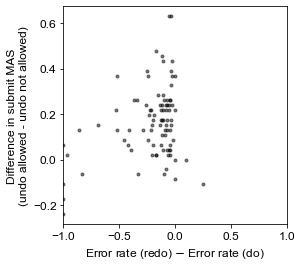

In [124]:
#scatter plot between error_rate_redo and error_rate_do
%matplotlib inline
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 12
fig, ax=plt.subplots(1,1,figsize=(4,4))

valid_subidx = np.where(~np.isnan(error_rate_[:,0]))[0]

aa = error_rate_[valid_subidx,1]-error_rate_[valid_subidx,0]
ax.scatter(aa, 
           mas_gain_persub[valid_subidx], color='k', marker='.', alpha=0.5)
corr, p = spearmanr(aa, mas_gain_persub[valid_subidx], nan_policy='omit')

print('error rate(do) and error rate(redo): corr={:.3f}, p={:.3f}'.format(corr, p))

# xlabel, ylabel
ax.set_xlabel(r'Error rate (redo) $-$ Error rate (do)')
ax.set_ylabel('Difference in submit MAS\n(undo allowed - undo not allowed)')

# set xlim
ax.set_xlim([-1,1])

# save
fig.savefig(out_dir + 'error_rate_do_redo_masgain.png', transparent=True,
            bbox_inches='tight', pad_inches=0.1)